In [1]:
# Importing the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data.

df_loan = pd.read_csv('loan.csv')
df_loan

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


The data reflects that it contains the categorical, majority is of binary data  as well as numerical data having 614  rows andd 13 columns.

In [3]:
df_loan.shape

(614, 13)

In [4]:
# Let's check the data types of each feature.

df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The datset contains 3 data types : 1 column having 'int64' , 4 columns having 'float64' and rest columns are of 'object' type.

So, below are the details of each feature of the dataset.

In [5]:
# Let's use the describe function to check the statistical summary of the dataset.

df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


OBSERVATIONS :
    
    1. The range of ApplicantIncome and CoapplicantIncome is high as compared to other variables. The range CoapplicantIncome and LoanAmount is moderate.
    2. With this, it is reflecting that th eoutliers are also present.
    3. The median of Loan_Amount_Term and Credit_History is more than their mean.
    4. The data is somewhat skewd.

In [6]:
# Let's check the null values.

df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

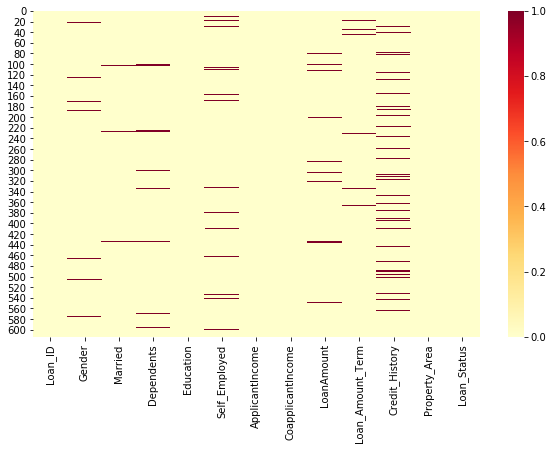

In [7]:
# Visualizing the null values using heatmap.

plt.figure(figsize=(10,6))
sns.heatmap(df_loan.isnull(), cmap = 'YlOrRd')
plt.show()

There are null values present in Gender, Departments, Self Employed, Loan Amount and Credit history which needs to be filled.

In [8]:
# Let's check the numerical data from the dataset.

loan_num = df_loan.select_dtypes(exclude='object')
loan_num.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0


In [9]:
# Let's check the categorical data from the dataset.

loan_cat = df_loan.select_dtypes(include='object')
loan_cat.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [10]:
# Let's check the correlation.

df_loan.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


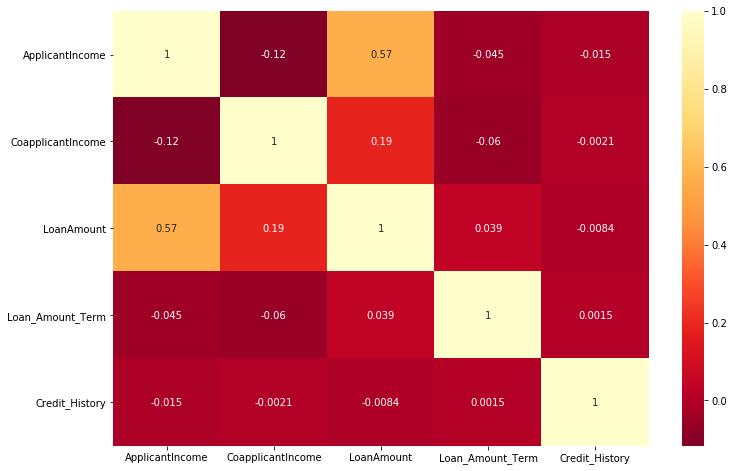

In [11]:
# Let's Visualize the correlation using heatmap.

plt.figure(figsize=(12,8))
sns.heatmap(df_loan.corr(), cmap= "YlOrRd_r", annot= True)

OBSERVATIONS :
    
    1. ApplicantIncome and CoapplicantIncome are highly negatively correlated.
    2. These both are only positively related with LoanAmount.
    3. Neither the strong positive nor the strong negative correlation present in any variable.

In [12]:
# Let's check  the value counts of each categorical feature.

for i in loan_cat.columns:
    x = loan_cat[i].value_counts()
    print("--------",i,"--------\n",x)
    print('\n')

-------- Loan_ID --------
 LP002794    1
LP002634    1
LP001641    1
LP001144    1
LP001716    1
           ..
LP001998    1
LP001750    1
LP001871    1
LP001688    1
LP001914    1
Name: Loan_ID, Length: 614, dtype: int64


-------- Gender --------
 Male      489
Female    112
Name: Gender, dtype: int64


-------- Married --------
 Yes    398
No     213
Name: Married, dtype: int64


-------- Dependents --------
 0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


-------- Education --------
 Graduate        480
Not Graduate    134
Name: Education, dtype: int64


-------- Self_Employed --------
 No     500
Yes     82
Name: Self_Employed, dtype: int64


-------- Property_Area --------
 Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


-------- Loan_Status --------
 Y    422
N    192
Name: Loan_Status, dtype: int64




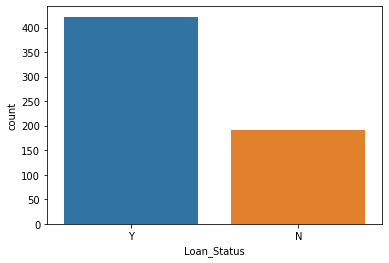

In [13]:
# UNIVARIATE ANALYSIS
# Visualizing the counts of target variable.

sns.countplot(df_loan['Loan_Status'],data=df_loan)
plt.show()

The loan of 422 people out of 614 was approved. Thus, the count of people whose loan was not approved is almost half of the no. people whose loan was approved.

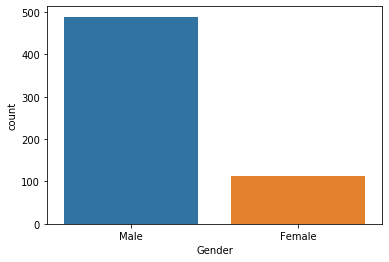

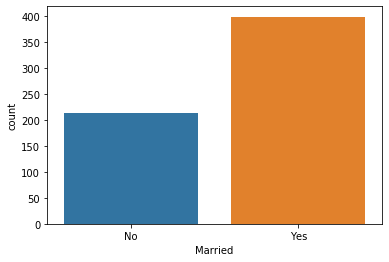

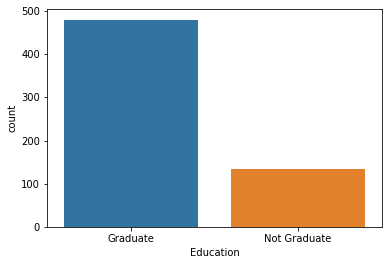

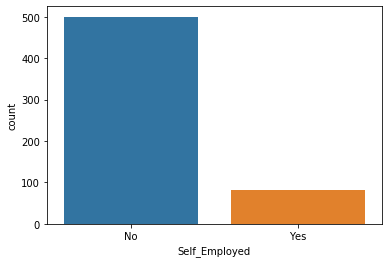

In [14]:
# Visualizing the counts of each categorical column/feature.

cat = loan_cat[['Gender','Married','Education', 'Self_Employed']]

for i in cat.columns:
    x = sns.countplot(cat[i],data=cat)
    plt.show()

OBSERVATIONS :
    
    1. Around 81% applicants are male in the dataset.
    2. Approx. 400 applicants are married.
    3. The not graduated applicants are below the half of the count of the applicants who are graduated.
    4. Around 16% applicants are self employed.

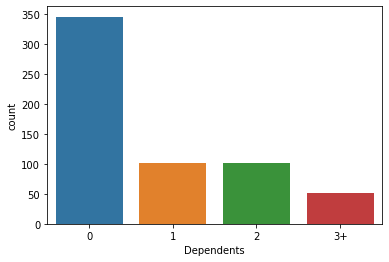

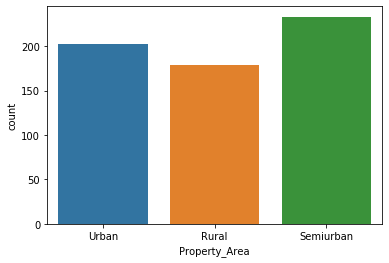

In [15]:
# Visualizing remaining categorical features
       
sns.countplot(df_loan['Dependents'],data=df_loan)
plt.show()

sns.countplot(df_loan['Property_Area'],data=df_loan)
plt.show()

1. More than half of the applicants do not have any dependents.
2. Most of the applicants belongs to Semiurban area followed by urban area.

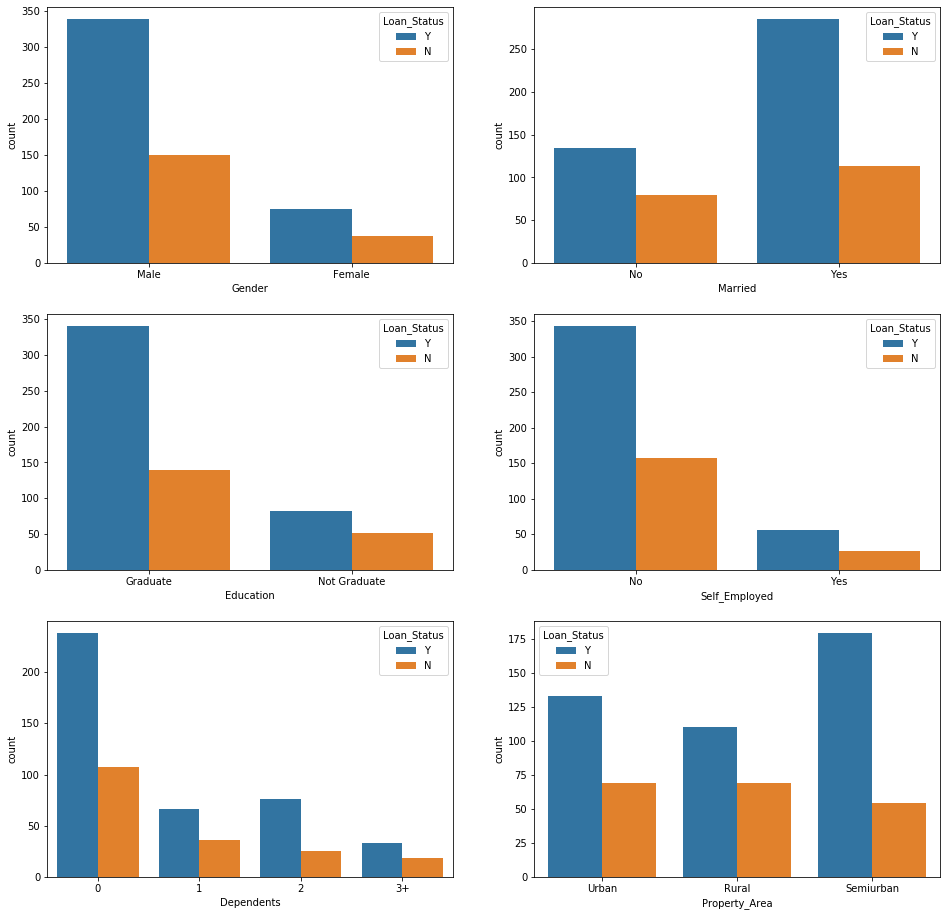

In [16]:
# Visualizing the categorical data with target variable as a hue. 

fig,ax = plt.subplots(3,2, figsize=(16,16))               
sns.countplot(x = "Gender", hue = "Loan_Status", data = df_loan, ax = ax[0,0]) 
sns.countplot(x = "Married", hue = "Loan_Status", data = df_loan, ax = ax[0,1]) 
sns.countplot(x = "Education", hue = "Loan_Status", data = df_loan, ax = ax[1,0]) 
sns.countplot(x = "Self_Employed", hue = "Loan_Status", data = df_loan, ax = ax[1,1])
sns.countplot(x = "Dependents",  hue = "Loan_Status", data = df_loan, ax = ax[2,0]) 
sns.countplot(x = "Property_Area",hue = "Loan_Status", data = df_loan, ax = ax[2,1]) 
plt.show()

WE INTERPRETATION FROM THE ABOVE :
    
    1. Majority of the applicants whose loans are approved are males. The males whose loans are not approved is approx. half of the no. of males whose loans were approved.
    2. Around 300 applicants are married whose loans are approved as compared to the applicants who are not married but their loans were approved.
    3. The count of graduates whose loans are approved is high as compared to the non graduates having approved loans.
    4. The percentage of self-employed applicants having approved loans is around 15% of the non self employed applicants having approved loans.
    5. Majority of the applicants whose loans are approved have no or 0 dependency.
    6. The max. no. of applicants whose loans are approved belongs to or having property in semi-urban area.

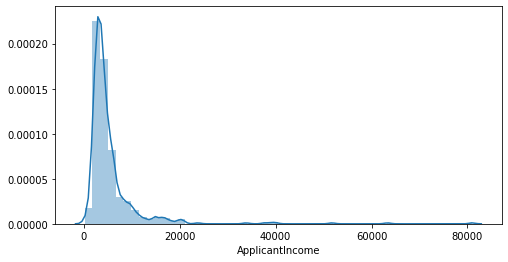

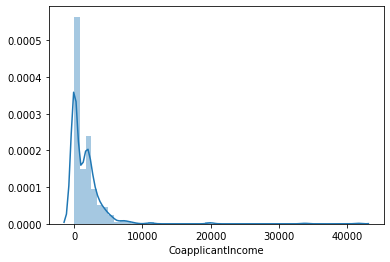

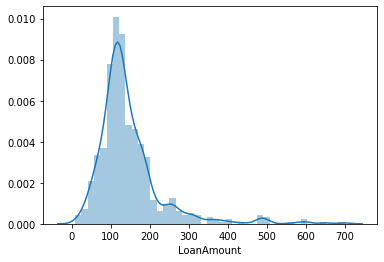

In [17]:
plt.figure(figsize=(8,4))
sns.distplot(df_loan['ApplicantIncome'])
plt.show()

sns.distplot(df_loan['CoapplicantIncome'])
plt.show()

sns.distplot(df_loan['LoanAmount'])
plt.show()

The all three numerical variables are rightly skewed i.e. positively skewed, which needs to be treated.

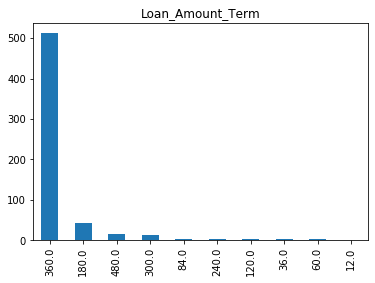

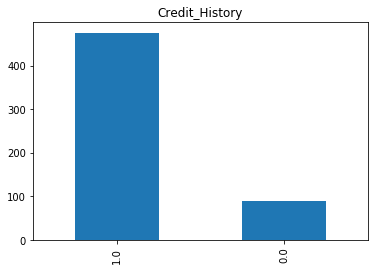

In [18]:
# Let's visualize the Loan_Amount_Term using bar plot.

df_loan['Loan_Amount_Term'].value_counts().plot.bar(title= 'Loan_Amount_Term')
plt.show()

df_loan['Credit_History'].value_counts().plot.bar(title= 'Credit_History')
plt.show()

1. The loan term for more than half of the data is for 360 months.
2. The majority of applicants of applicants no. above 400 have the credit history.

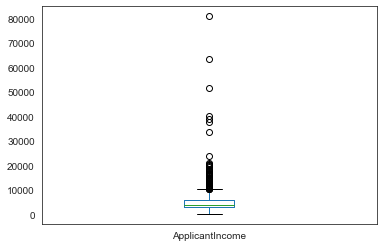

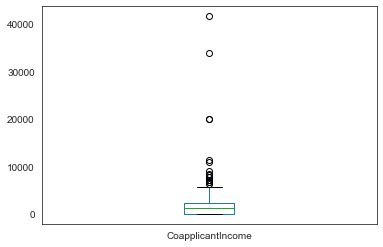

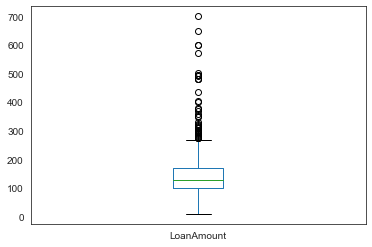

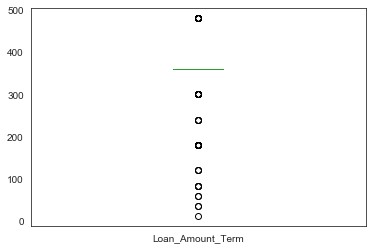

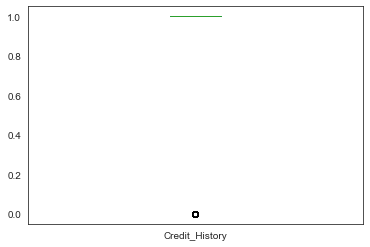

In [19]:
# Let's plot the outliers

for i in loan_num.columns:
    sns.set_style('white')
    x = loan_num[i].plot.box()
    plt.show()

The above boxplots represents the presence of a lot of outliers.

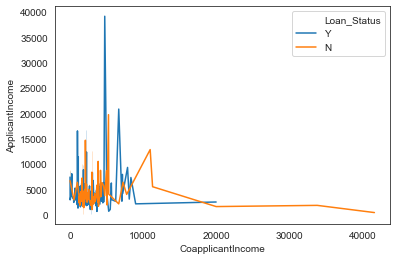

In [20]:
# BIVARIATE ANALYSIS
# relationship of CoapplicantIncome with ApplicantIncome as the target variable being hue.

sns.lineplot(x="CoapplicantIncome",y="ApplicantIncome",hue="Loan_Status",data=df_loan)
plt.show()

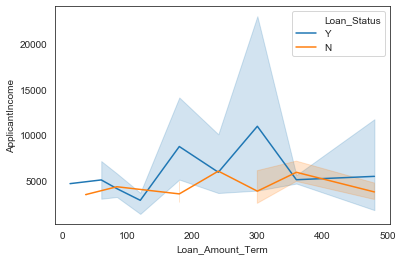

In [22]:
# Visualizing the relationship of Loan_Amount_Term with ApplicantIncome as the target variable being hue.

sns.lineplot(x="Loan_Amount_Term",y="ApplicantIncome",hue="Loan_Status",data=df_loan)
plt.show()

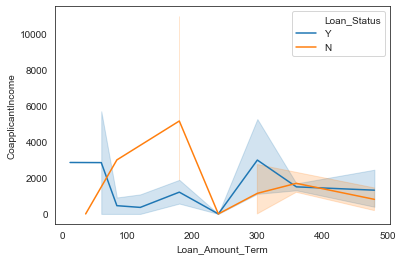

In [23]:
# Visualizing the relationship of Loan_Amount_Term with CoapplicantIncome as the target variable being hue.

sns.lineplot(x="Loan_Amount_Term",y="CoapplicantIncome",hue="Loan_Status",data=df_loan)
plt.show()

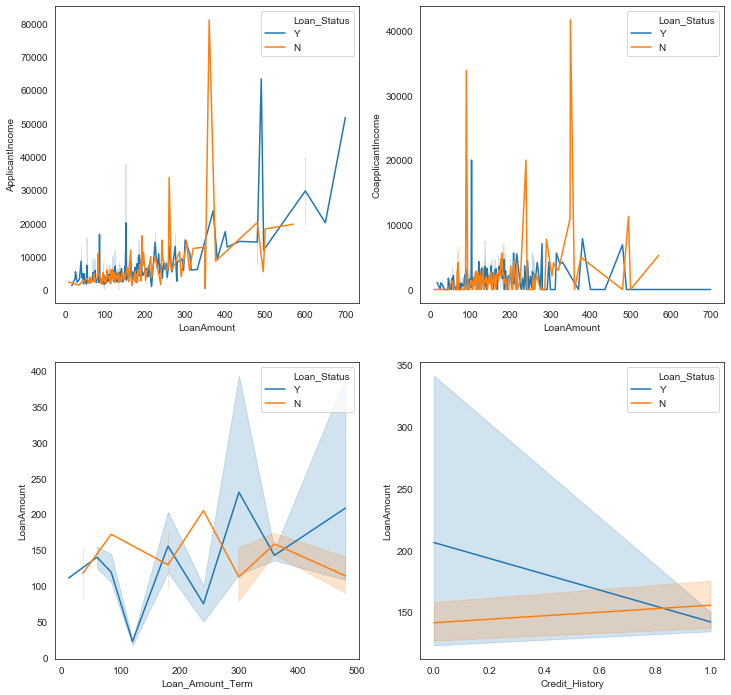

In [24]:
# Visualizing the relationship of numerical data with each otherr being target variable as hue using line plot.

fig,ax = plt.subplots(2,2, figsize=(12,12))               
sns.lineplot(x="LoanAmount", y="ApplicantIncome", hue="Loan_Status",data=df_loan,ax = ax[0,0]) 
sns.lineplot(x="LoanAmount", y="CoapplicantIncome", hue="Loan_Status",data=df_loan, ax = ax[0,1]) 
sns.lineplot(x="Loan_Amount_Term", y="LoanAmount",hue="Loan_Status",data=df_loan, ax = ax[1,0]) 
sns.lineplot(x="Credit_History", y="LoanAmount",hue="Loan_Status",data=df_loan, ax = ax[1,1]) 
plt.show()

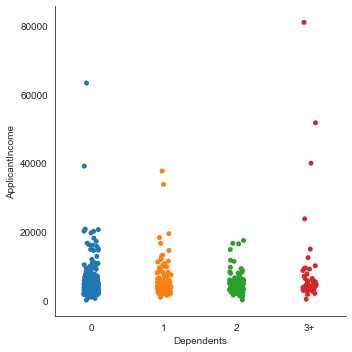

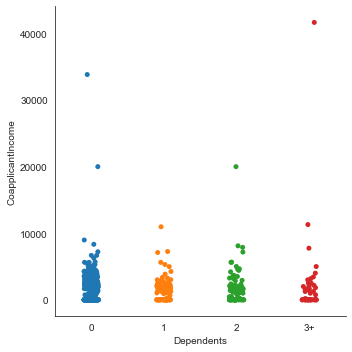

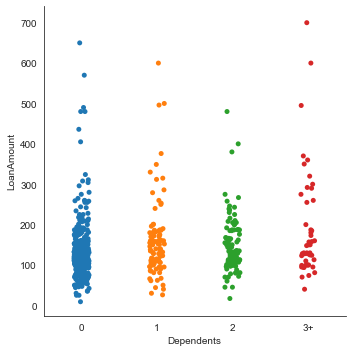

In [25]:
# Relation Dependents with other numerical data.

sns.catplot(x="Dependents", y="ApplicantIncome", data=df_loan)
plt.show()

sns.catplot(x="Dependents", y="CoapplicantIncome", data=df_loan)
plt.show()

sns.catplot(x="Dependents", y="LoanAmount", data=df_loan)
plt.show()

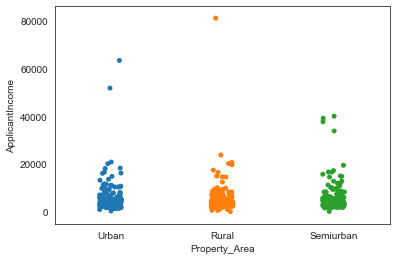

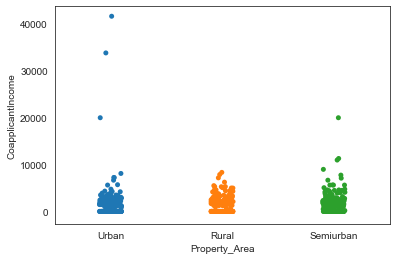

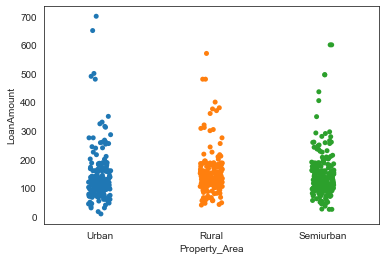

In [26]:
# Relation Property_Area with other numerical data.

sns.stripplot(x="Property_Area", y="ApplicantIncome", data=df_loan)
plt.show()

sns.stripplot(x="Property_Area", y="CoapplicantIncome", data=df_loan)
plt.show()

sns.stripplot(x="Property_Area", y="LoanAmount", data=df_loan)
plt.show()

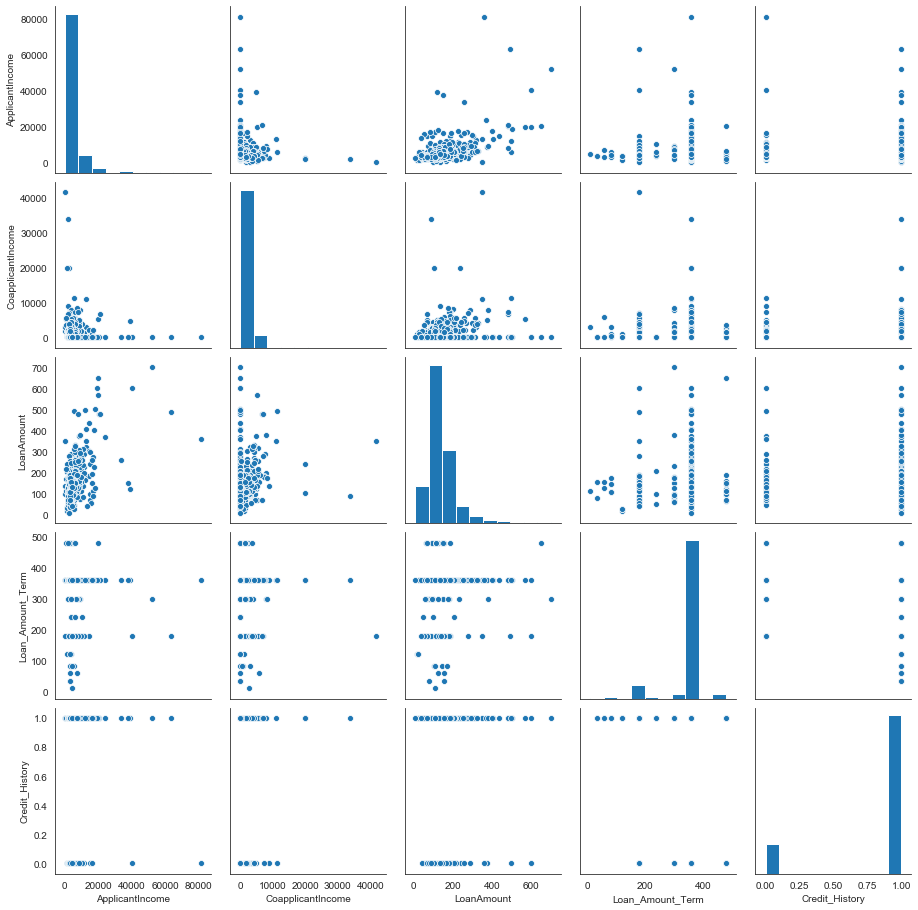

In [27]:
# Let's see the pairplot.

sns.pairplot(df_loan)

In [28]:
# FIlling the Missing Values.
 
# Now let's fill the null values present in 'LoanAmount' with it's median value and 'Loan_Amount_Term' with it's mean.

df_loan['LoanAmount'].replace(np.NaN,df_loan['LoanAmount'].median(),inplace=True)
df_loan['Loan_Amount_Term'].replace(np.NaN,df_loan['Loan_Amount_Term'].mean(),inplace=True)

In [29]:
# Let's check the mode of the categorical data and data having binary nature.

gen_mode = df_loan['Gender'].mode()
print("Mode of Gender :", gen_mode, '\n')

dep_mode = df_loan['Dependents'].mode()
print("Mode of Dependents :", dep_mode, '\n')

slf_mode = df_loan['Self_Employed'].mode()
print("Mode of Self Employed :", slf_mode, '\n')

mr_mode = df_loan['Married'].mode()
print("Mode of Married :", mr_mode, '\n')

Mode of Gender : 0    Male
dtype: object 

Mode of Dependents : 0    0
dtype: object 

Mode of Self Employed : 0    No
dtype: object 

Mode of Married : 0    Yes
dtype: object 



In [30]:
# Replacing the null values with the mode of the rest columns having null values.

df_loan.Gender = df_loan.Gender.fillna('Male')
df_loan.Dependents = df_loan.Dependents.fillna('0')
df_loan.Self_Employed = df_loan.Self_Employed.fillna('No')
df_loan.Credit_History = df_loan.Credit_History.fillna('1.0')
df_loan.Married  = df_loan.Married .fillna('Yes')

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


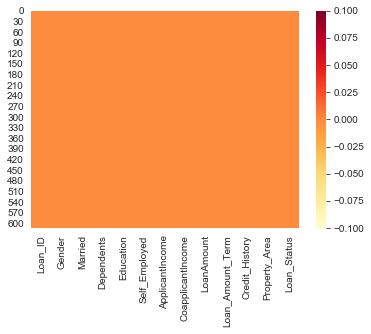

In [31]:
# Again checking the null values after filling the same.

print(df_loan.isnull().sum())
sns.heatmap(df_loan.isnull(), cmap = 'YlOrRd')
plt.show()

Thus, all the null values are filled.

In [32]:
# Dropping the Loan_ID as with this feature there is no effect on the dataset.

df_loan = df_loan.drop(['Loan_ID'], axis=1)
df_loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [33]:
# Replacing the target variable as :
# 0 = Y and 1 = N
# Checking the head after replacing.

df_loan['Loan_Status'] = df_loan.Loan_Status.replace({"Y":0, "N":1})
df_loan.Loan_Status.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [34]:
# Let's  make a list of categorical data.

lcat = df_loan.select_dtypes(include='object')
lcat.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area'],
      dtype='object')

In [35]:
# Creating the dummies for the categorical columns.

lcat_final = pd.get_dummies(lcat,drop_first=True)
lcat_final.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0,0,0,1,0,0,1
1,1,1,1,0,0,0,0,1,0,0,0
2,1,1,0,0,0,0,1,1,0,0,1
3,1,1,0,0,0,1,0,1,0,0,1
4,1,0,0,0,0,0,0,1,0,0,1


In [36]:
lcat_final.shape

(614, 11)

In [37]:
# Let's  make a list of numerical data.

lnum = df_loan.select_dtypes(exclude='object')
lnum.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status
0,5849,0.0,128.0,360.0,0
1,4583,1508.0,128.0,360.0,1
2,3000,0.0,66.0,360.0,0
3,2583,2358.0,120.0,360.0,0
4,6000,0.0,141.0,360.0,0


In [38]:
# Concatinating the dummie variables with numerical data and making a final dataset with all valus being numerical in nature..

df_loan = pd.concat([lnum,lcat_final], axis = 1)
df_loan.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,0,1,0,0,0,0,0,0,1,0,0,1
1,4583,1508.0,128.0,360.0,1,1,1,1,0,0,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,0,1,1,0,0,0,0,1,1,0,0,1
3,2583,2358.0,120.0,360.0,0,1,1,0,0,0,1,0,1,0,0,1
4,6000,0.0,141.0,360.0,0,1,0,0,0,0,0,0,1,0,0,1


In [39]:
# Again checking the shape of the dataset after feature engineering.

df_loan.shape

(614, 16)

In [40]:
# Let's check the skewness of the data before removing the outliers.

df_loan.skew()

ApplicantIncome            6.539513
CoapplicantIncome          7.491531
LoanAmount                 2.743053
Loan_Amount_Term          -2.389680
Loan_Status                0.809998
Gender_Male               -1.648795
Married_Yes               -0.644850
Dependents_1               1.798506
Dependents_2               1.814433
Dependents_3+              3.028961
Education_Not Graduate     1.367622
Self_Employed_Yes          2.159796
Credit_History_1.0        -1.310835
Credit_History_1.0         3.068326
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
dtype: float64

In [41]:
# Let's now check the outliers and clean the data.

from scipy.stats import zscore

z = np.abs(zscore(df_loan))
print(z.shape)

# Removing the outliers.

df_hr = df_loan.loc[(z<3).all(axis=1)]
print(df_loan.shape)

(614, 16)
(614, 16)


In [42]:
# Let's check the skewness of the data after removing the outliers.

df_loan.skew()

ApplicantIncome            6.539513
CoapplicantIncome          7.491531
LoanAmount                 2.743053
Loan_Amount_Term          -2.389680
Loan_Status                0.809998
Gender_Male               -1.648795
Married_Yes               -0.644850
Dependents_1               1.798506
Dependents_2               1.814433
Dependents_3+              3.028961
Education_Not Graduate     1.367622
Self_Employed_Yes          2.159796
Credit_History_1.0        -1.310835
Credit_History_1.0         3.068326
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
dtype: float64

Now it is not showing any outliers present. Thus, the data is cleaned now and the model selection and evaluation can be done.

In [43]:
# Let's check the skewness of the data after removing the outliers.

df_loan.skew()

ApplicantIncome            6.539513
CoapplicantIncome          7.491531
LoanAmount                 2.743053
Loan_Amount_Term          -2.389680
Loan_Status                0.809998
Gender_Male               -1.648795
Married_Yes               -0.644850
Dependents_1               1.798506
Dependents_2               1.814433
Dependents_3+              3.028961
Education_Not Graduate     1.367622
Self_Employed_Yes          2.159796
Credit_History_1.0        -1.310835
Credit_History_1.0         3.068326
Property_Area_Semiurban    0.497948
Property_Area_Urban        0.729723
dtype: float64

There is no difference in the skewness as there are o outliers removed.

In [44]:
# Separating the input and target variables

X = df_loan.drop(columns=["Loan_Status"])
y = df_loan[["Loan_Status"]]

In [45]:
# Let's check the shape of input and outpuut variables.

print(X.shape)
print(y.shape)

(614, 15)
(614, 1)


In [46]:
# Let's check the head of the input variables.
X.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1,0,0,0,0,0,0,1,0,0,1
1,4583,1508.0,128.0,360.0,1,1,1,0,0,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1,1,0,0,0,0,1,1,0,0,1
3,2583,2358.0,120.0,360.0,1,1,0,0,0,1,0,1,0,0,1
4,6000,0.0,141.0,360.0,1,0,0,0,0,0,0,1,0,0,1


In [47]:
# Let's check the head of the output variables.
y.head()

,Loan_Status
0,0
1,1
2,0
3,0
4,0


In [48]:
# Scaling the Input variables

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 0.07299082, -0.55448733, -0.21124125, ..., -0.29774567,
        -0.7820157 ,  1.42814704],
       [-0.13441195, -0.03873155, -0.21124125, ..., -0.29774567,
        -0.7820157 , -0.70020801],
       [-0.39374734, -0.55448733, -0.94899647, ..., -0.29774567,
        -0.7820157 ,  1.42814704],
       ...,
       [ 0.43717437, -0.47240418,  1.27616847, ..., -0.29774567,
        -0.7820157 ,  1.42814704],
       [ 0.35706382, -0.55448733,  0.49081614, ..., -0.29774567,
        -0.7820157 ,  1.42814704],
       [-0.13441195, -0.55448733, -0.15174486, ..., -0.29774567,
         1.2787467 , -0.70020801]])

In [49]:
# Importing the neccesary sklearn libraries.

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve,auc, confusion_matrix

In [51]:
lr = LogisticRegression()
gnb = GaussianNB()
sv = SVC()
dt = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [52]:
# Creating the list which holds all the algorithms.

models = []
models.append(('LogisticRegression', lr))
models.append(('GaussianNB', gnb))
models.append(('SVC', sv))
models.append(('DecisionTreeClassifier', dt))
models.append(('KNeighborsClassifier', knn))
models.append(('RandomForestClassifier', rf))

In [55]:
# Splitting the training and testing data and finding the maximum accuracy score at best random state.

def m (clf ,X, y):
    max_acc_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_scr = accuracy_score(pred, y_test)
        if acc_scr > max_acc_scr:
            max_acc_scr = acc_scr
            final_r_state = r_state
    
    print("Maximum Accuracy score is :", max_acc_scr, "achieved at :", final_r_state)
    print("\n")
    print("Classification Report :\n", classification_report(pred, y_test))
    print("\n")
    print("Confusion Matrix :\n", confusion_matrix(pred, y_test))
    print("\n")       
    false_positive_rate, true_positive_rate, threshold = roc_curve(pred, y_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_CURVE :", roc_auc)
    print("\n")
    print(sns.heatmap(confusion_matrix(pred, y_test), annot=True))
    print('\n')

-------Logistic Regression-------
Maximum Accuracy score is : 0.8536585365853658 achieved at : 67


Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.71      0.82       101
           1       0.40      0.86      0.54        22

    accuracy                           0.74       123
   macro avg       0.68      0.79      0.68       123
weighted avg       0.86      0.74      0.77       123



Confusion Matrix :
 [[72 29]
 [ 3 19]]


ROC_AUC_CURVE : 0.7882538253825383


AxesSubplot(0.125,0.125;0.62x0.755)


Cross validation score : 0.8078368652538984
Standard Deviationscore : 0.02923416378093254




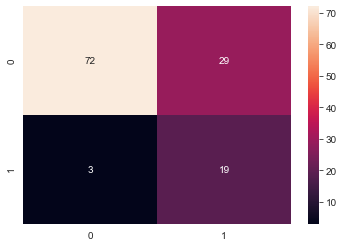

In [56]:
# Let's check the accuracy score and other scores of Logistic Regression.

print("-------Logistic Regression-------")
lr = LogisticRegression()
r_state = m(lr, X, y)
print("Cross validation score :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").std())
print("\n")

-------GaussianNB-------
Maximum Accuracy score is : 0.8617886178861789 achieved at : 94


Classification Report :
               precision    recall  f1-score   support

           0       0.81      0.71      0.76        86
           1       0.48      0.62      0.54        37

    accuracy                           0.68       123
   macro avg       0.65      0.67      0.65       123
weighted avg       0.71      0.68      0.69       123



Confusion Matrix :
 [[61 25]
 [14 23]]


ROC_AUC_CURVE : 0.6654619736015084


AxesSubplot(0.125,0.125;0.62x0.755)


Cross validation score : 0.8078368652538984
Standard Deviationscore : 0.02923416378093254




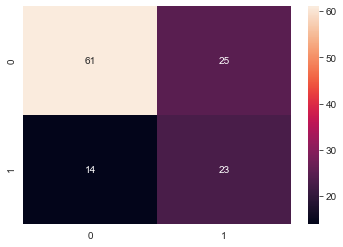

In [57]:
# Let's check the accuracy score and other scores of GaussianNB.

print("-------GaussianNB-------")
gnb = GaussianNB()
r_state = m(gnb, X, y)
print("Cross validation score :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").std())
print("\n")

-------DecisionTreeClassifier-------
Maximum Accuracy score is : 0.8455284552845529 achieved at : 94


Classification Report :
               precision    recall  f1-score   support

           0       0.77      0.72      0.74        81
           1       0.52      0.60      0.56        42

    accuracy                           0.67       123
   macro avg       0.65      0.66      0.65       123
weighted avg       0.69      0.67      0.68       123



Confusion Matrix :
 [[58 23]
 [17 25]]


ROC_AUC_CURVE : 0.6556437389770724


AxesSubplot(0.125,0.125;0.62x0.755)


Cross validation score : 0.8078368652538984
Standard Deviationscore : 0.02923416378093254




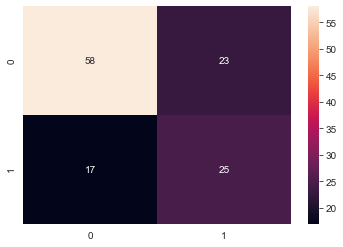

In [58]:
# Let's check the accuracy score and other scores of DecisionTreeClassifier.

print("-------DecisionTreeClassifier-------")
dtc = DecisionTreeClassifier()
r_state = m(dtc, X, y)
print("Cross validation score :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").std())
print("\n")

-------SVC-------
Maximum Accuracy score is : 0.8699186991869918 achieved at : 63


Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.71      0.81       102
           1       0.38      0.86      0.52        21

    accuracy                           0.73       123
   macro avg       0.67      0.78      0.67       123
weighted avg       0.86      0.73      0.76       123



Confusion Matrix :
 [[72 30]
 [ 3 18]]


ROC_AUC_CURVE : 0.7815126050420168


AxesSubplot(0.125,0.125;0.62x0.755)


Cross validation score : 0.8078368652538984
Standard Deviationscore : 0.02923416378093254




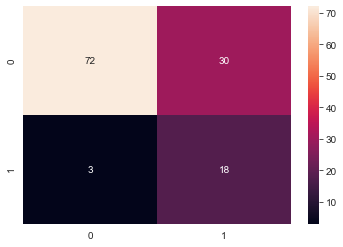

In [59]:
# Let's check the accuracy score and other scores of SVC.

print("-------SVC-------")
sv = SVC()
r_state = m(sv, X, y)
print("Cross validation score :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").std())
print("\n")

-------KNeighborsClassifier-------
Maximum Accuracy score is : 0.8292682926829268 achieved at : 97


Classification Report :
               precision    recall  f1-score   support

           0       0.95      0.66      0.78       108
           1       0.23      0.73      0.35        15

    accuracy                           0.67       123
   macro avg       0.59      0.70      0.56       123
weighted avg       0.86      0.67      0.72       123



Confusion Matrix :
 [[71 37]
 [ 4 11]]


ROC_AUC_CURVE : 0.6953703703703704


AxesSubplot(0.125,0.125;0.62x0.755)


Cross validation score : 0.8078368652538984
Standard Deviationscore : 0.02923416378093254




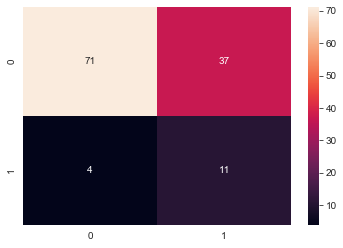

In [60]:
# Let's check the accuracy score and other scores of KNeighborsClassifier.

print("-------KNeighborsClassifier-------")
knnc = KNeighborsClassifier()
r_state = m(knnc, X, y)
print("Cross validation score :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").std())
print("\n")

-------RandomForestClassifier-------
Maximum Accuracy score is : 0.8536585365853658 achieved at : 63


Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.72      0.80        95
           1       0.44      0.75      0.55        28

    accuracy                           0.72       123
   macro avg       0.67      0.73      0.68       123
weighted avg       0.80      0.72      0.74       123



Confusion Matrix :
 [[68 27]
 [ 7 21]]


ROC_AUC_CURVE : 0.7328947368421053


AxesSubplot(0.125,0.125;0.62x0.755)


Cross validation score : 0.8078368652538984
Standard Deviationscore : 0.02923416378093254




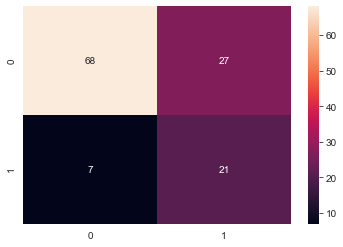

In [61]:
# Let's check the accuracy score and other scores of different algorithms.

print("-------RandomForestClassifier-------")
rfc = RandomForestClassifier()
r_state = m(rfc, X, y)
print("Cross validation score :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").mean())
print("Standard Deviationscore :", cross_val_score(lr, X, y, cv=5, scoring = "accuracy").std())
print("\n")

 Thus selecting the final model which is SVC, giving the best results out of all the algorithms tested with 0.8699 accuracy at random state 63.

In [63]:
# saving the model using joblib
from sklearn.externals import joblib

# Save the model as a pickle in a file
joblib.dump(sv, 'sv_fraud_loan_pred.pkl')

['sv_fraud_loan_pred.pkl']